In [54]:
#!pip install seaborn
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [55]:
print("информация про таблицу:")
df.info()

информация про таблицу:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [56]:
print("статистика числовых данных")
df.describe().T

статистика числовых данных


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [57]:
df['average_target'] = (df["math score"] +  df["reading score"] +  df["writing score"])/3
df["average_target(>=70)"] = ((df["math score"] +  df["reading score"] +  df["writing score"])/3 >= 70)
print('значения целевой переменной')
print(df['average_target'].head())
print("распределение целевой переменной")
df["average_target(>=70)"].value_counts()
#замена some high school на high school для однозначности признака
#df.loc[df['parental level of education'] == 'some high school'] = 'high school'

значения целевой переменной
0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average_target, dtype: float64
распределение целевой переменной


average_target(>=70)
False    541
True     459
Name: count, dtype: int64

In [58]:
print("количество пропусков")
print(df.isnull().sum())

количество пропусков
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_target                 0
average_target(>=70)           0
dtype: int64


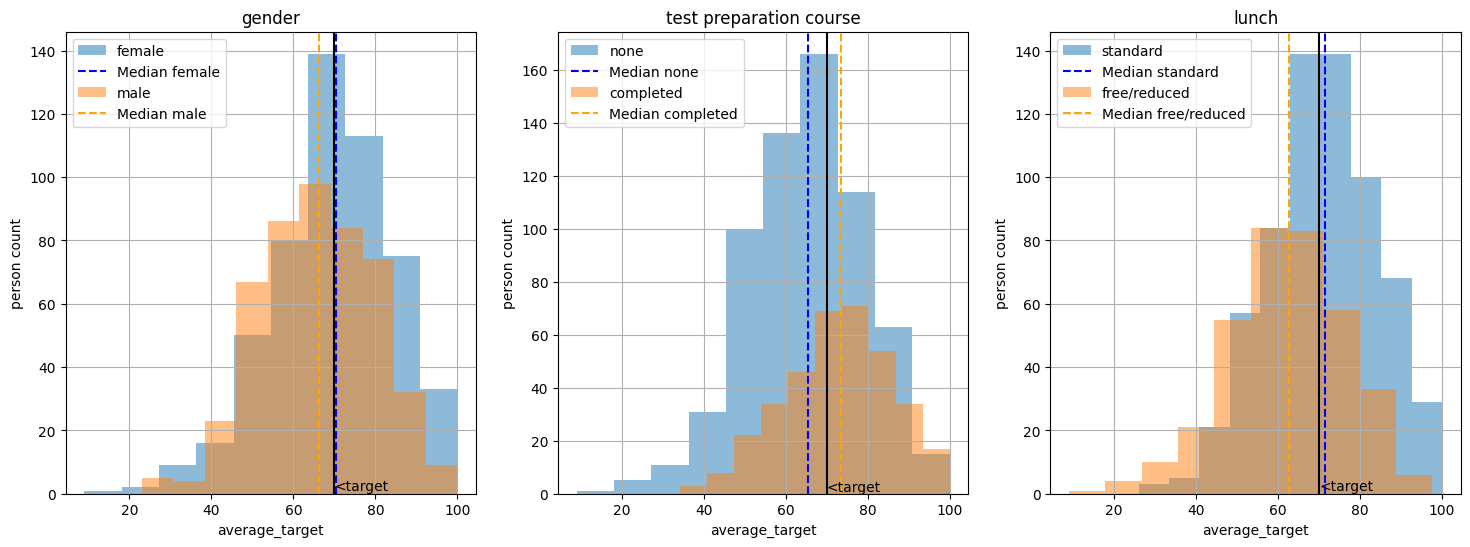

In [59]:
#анализ распределения признаков с медианами
gen_and_prep = ['gender', 'test preparation course', 'lunch']
fig, axes = plt.subplots(1,3, figsize=(18,6))
colors = ['blue', 'orange']
for ax, n in zip(axes,gen_and_prep):
    for v, i in zip(df[n].unique(), colors):
        subset = df[df[n] == v]['average_target']
        subset.hist(label=v, ax = ax, alpha=0.5)
        median_value = subset.median()
        ax.axvline(x=median_value, color= i, linestyle='dashed', label=f"Median {v}")
    ax.legend()
    ax.set_xlabel('average_target')
    ax.set_ylabel('person count')
    ax.set_title(n)
    ax.axvline(x = 70, color='black')
    #ax.axvline(x = df["average_target"].mean(), color='red')
    ax.text(70,1, "<target")



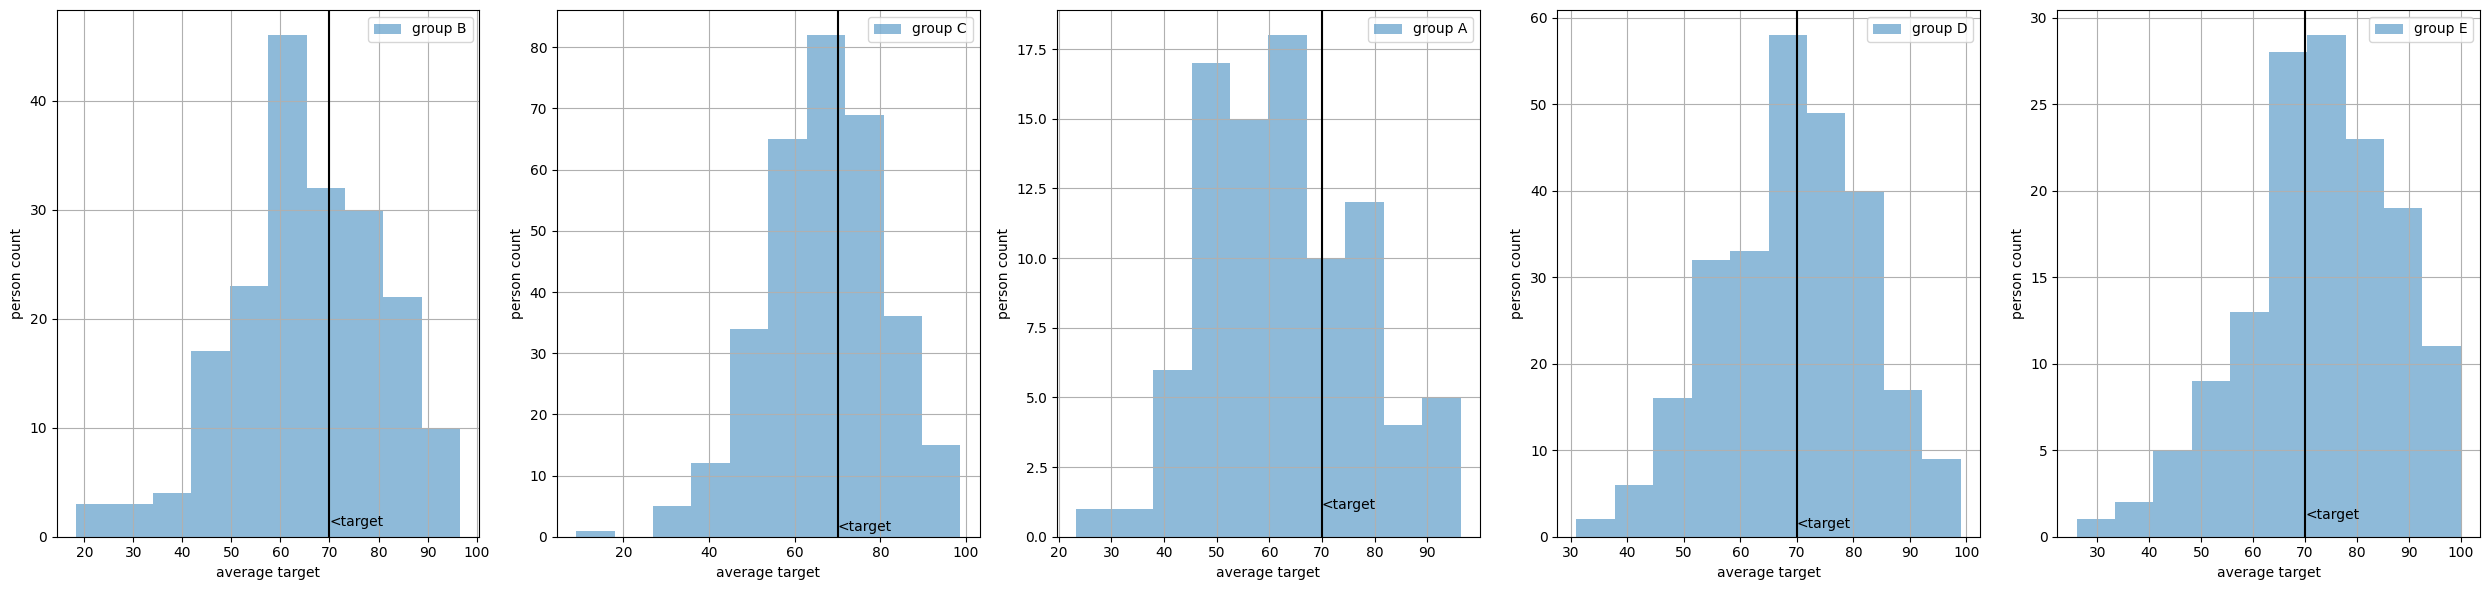

In [60]:
#анализ распределения признаков
n = 'race/ethnicity'
unique_groups = df[n].unique()

fig, axes = plt.subplots(1 , len(unique_groups) , figsize=(len(unique_groups)*5,6))

for ax, v in zip(axes, unique_groups):
    df[df[n] == v]['average_target'].hist(label = v, ax=ax, alpha=0.5)
    ax.legend()
    ax.set_xlabel("average target")
    ax.set_ylabel("person count")
    ax.axvline(x = 70, color='black')
    ax.text(70,1, "<target")
#plt.xlabel("average target")
plt.tight_layout()
plt.show()

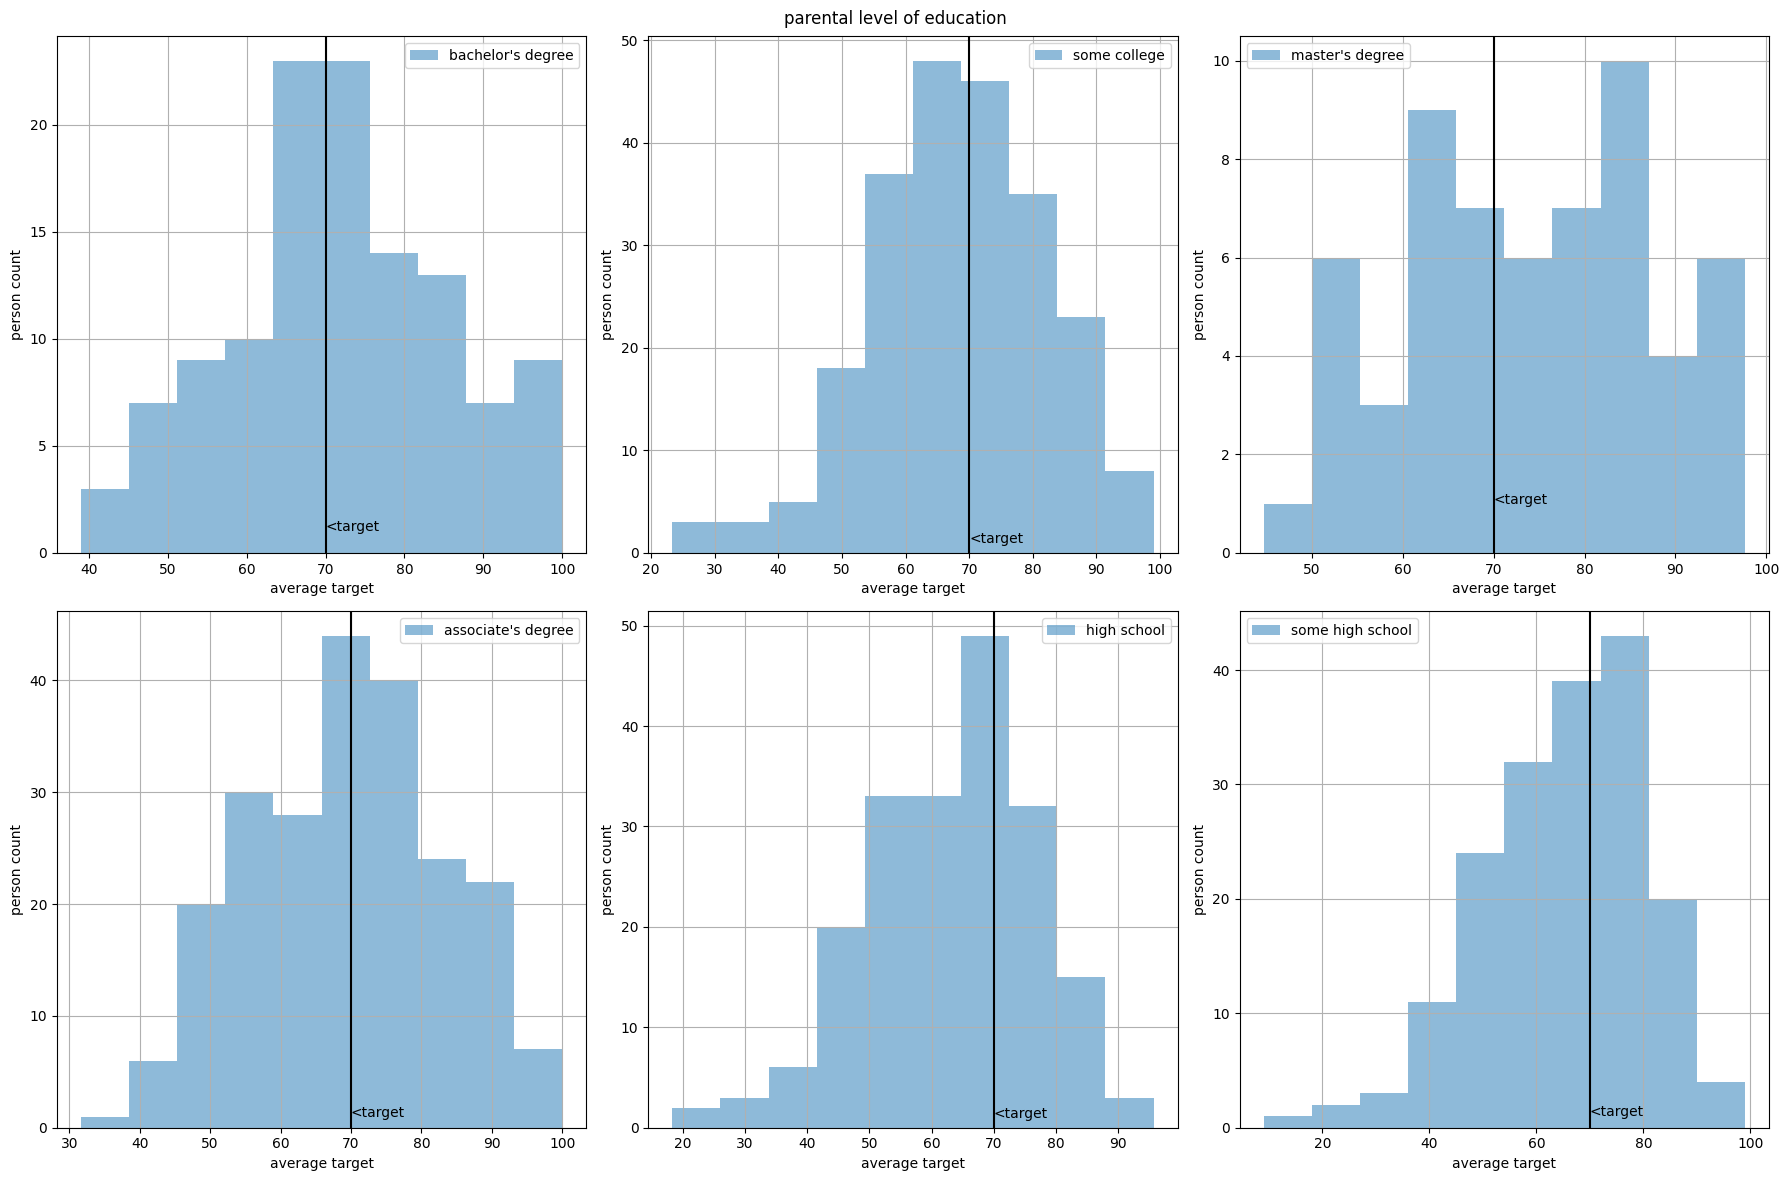

In [61]:
#анализ распределения признаков
n = 'parental level of education'
unique_groups = df[n].unique()

fig, axes = plt.subplots(2 , len(unique_groups)  // 2 , figsize=(len(unique_groups)*3,12))
axes = axes.flatten()

for ax, v in zip(axes, unique_groups):
    df[df[n] == v]['average_target'].hist(label = v, ax=ax, alpha=0.5)
    ax.legend()
    ax.set_xlabel("average target")
    ax.set_ylabel("person count")
    ax.axvline(x = 70, color='black')
    ax.text(70,1, "<target")
plt.suptitle('parental level of education')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4160/1457723759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = target_value, y = feature, ax = axes[i], palette=['skyblue', 'salmon'])
/tmp/ipykernel_4160/1457723759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = target_value, y = feature, ax = axes[i], palette=['skyblue', 'salmon'])
/tmp/ipykernel_4160/1457723759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = target_value, y = feature, ax = axes[i], palette=['skyblue', 'salmon'])


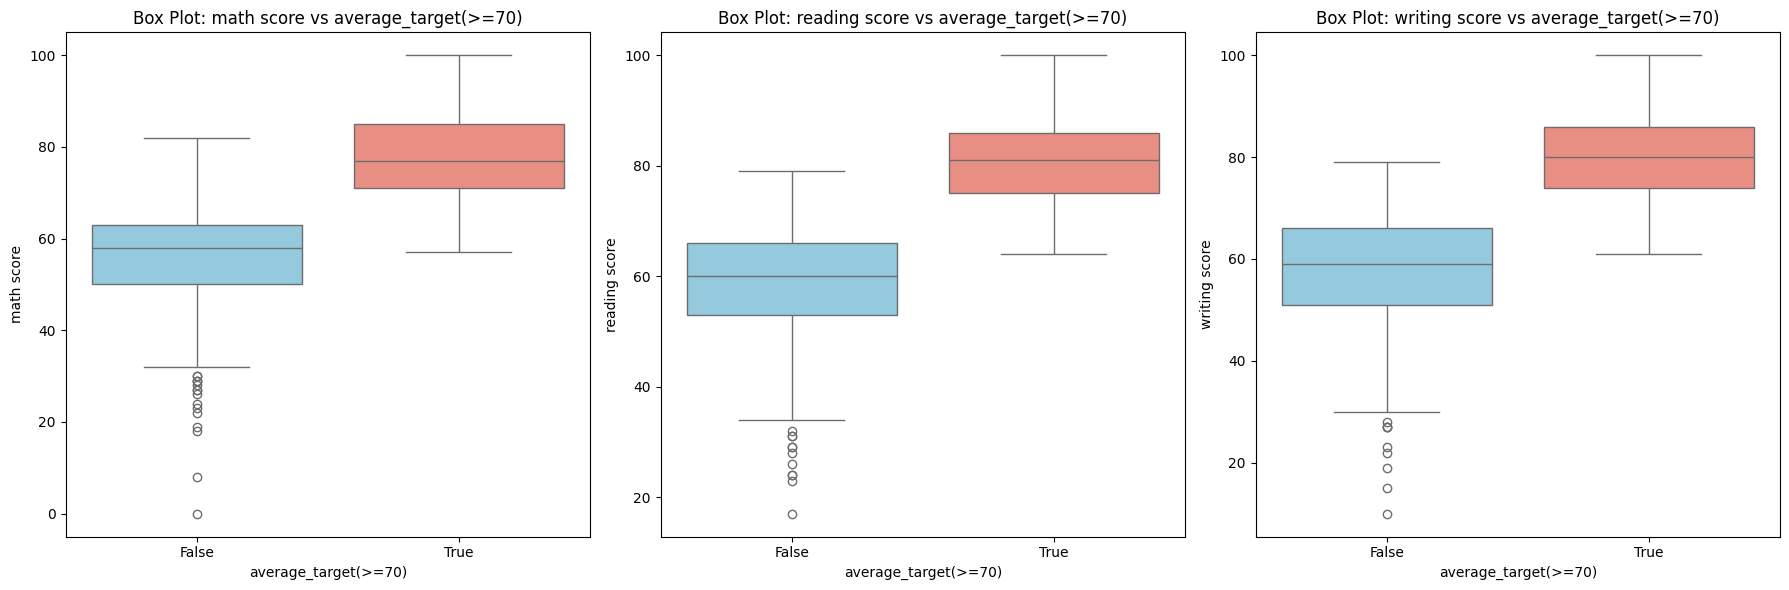

In [62]:
#обнаружение выбросов
num_features = ['math score', 'reading score', 'writing score']
target_value = 'average_target(>=70)'

fig, axes = plt.subplots(1, len(num_features), figsize=(18,6))
for i, feature in enumerate(num_features):
    sns.boxplot(data = df, x = target_value, y = feature, ax = axes[i], palette=['skyblue', 'salmon'])
    axes[i].set_title(f'Box Plot: {feature} vs {target_value}')
    axes[i].set_xlabel(target_value)
    axes[i].set_ylabel(feature)
plt.tight_layout()
plt.show()
                

In [64]:
df_cleaned = df.copy()

for column in num_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Подсчитываем количество выбросов
    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outliers_percent = outliers_count / len(df) * 100

    print(f"Признак {column}: обнаружено {outliers_count} выбросов ({outliers_percent:.2f}%)")


Признак math score: обнаружено 8 выбросов (0.80%)
Признак reading score: обнаружено 6 выбросов (0.60%)
Признак writing score: обнаружено 5 выбросов (0.50%)


In [65]:
#чистка выбросов

for column in num_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
print(f"new size of dataframe: {df.shape}")

new size of dataframe: (986, 10)


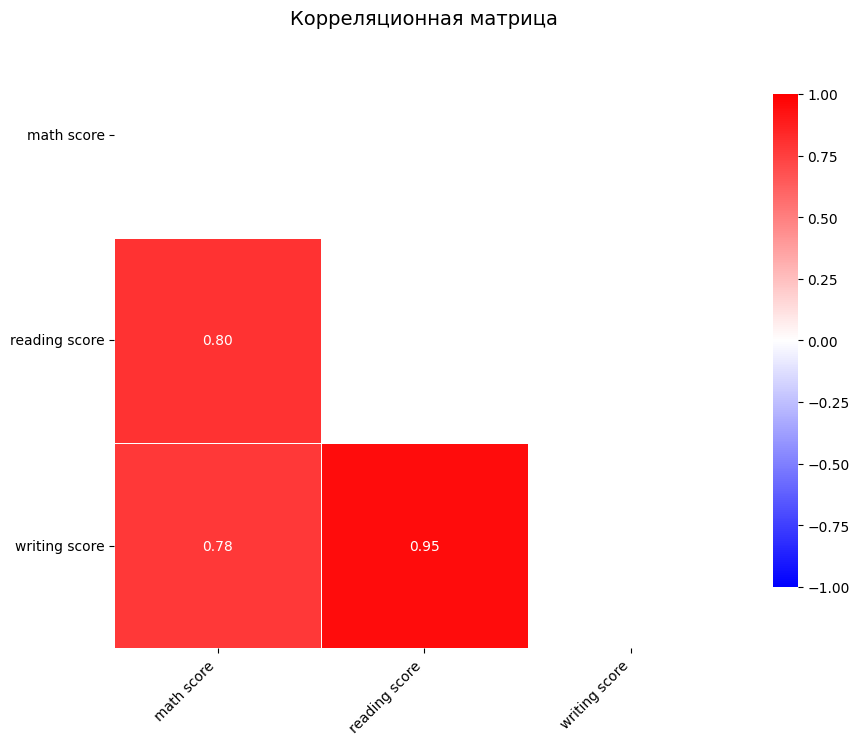

In [66]:
df_corr = df.drop(columns=['average_target'], errors='ignore')

df_corr = df_corr.select_dtypes(include=[np.number])

correlation_matrix = df_corr.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap="bwr",  
            vmin=-1, vmax=1,  
            center=0, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Корреляционная матрица", fontsize=14)

plt.show()

Основные выводы по результатам EDA:
1) Представлено распределение различных классов относительно целевой переменной(средний балл набранный студентом);

2) Обнаружены выбросы в трех числовых признаков и была выполнена их чистка;
      
3) Важные закономерности:
      -выявлены числовые признаки имеющие наибольшую корреляцию(reading score и writing score);
      -замечена взаимосвязть между графиками гистограмм других признаков;

4) Для удобства работы с данными были добавлены новые два признака:
      -средний балл студента набранный по трем предметам;
      -факт того, прошел ли порог в 70 баллов студент по своему среднему показателю;

5) Определены наиболее важные признаки влияющие на последний признак в четвертом пункте:
      -студенты с признаком group E по сравнению с другим группами имеют большую предрасположенность к преодолению порога в 70 баллов;
      -студенты, прошедшие подготовительный курс, оказались более способными для прохождения порога в отличие от тех, кто не проходил подобный курс;
      -студенты, которые обедают во время учебы, также оказались более способными к преодолению порога;
      -сильная взаимосвязь между результатами reading score и writing score, то есть при наличии высокого балла по одному из них вероятнее всего, что и по второму тоже высокий балл;
